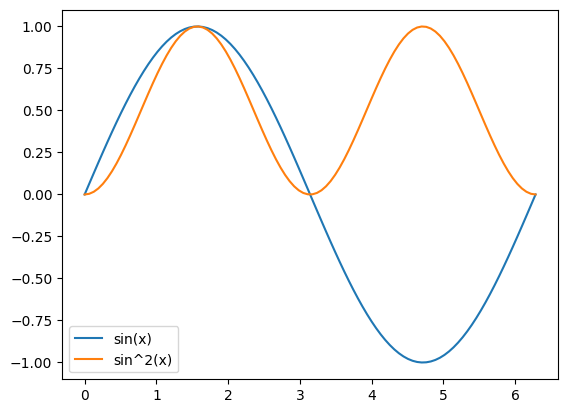

In [1]:
# plot sin and sin^2
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(x)**2

plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='sin^2(x)')
plt.legend()
plt.show()

In [4]:
np.sin(30/180*np.pi)**2

0.24999999999999994

In [49]:
def pdet_grb(theta, dl):

    # z=5==>dl=46652.223Mpc
    # 874.729 is factor to make GW170817 merely visible at 40Mpc and 30deg off-axis
    return np.cos(theta/180*np.pi)**2 * (1/dl**2) * 1/4.5946804673955824e-10

In [55]:
pdet_grb(90, 40)

5.1001907032230585e-27

In [50]:
pdet_grb(0, 46652.223)

1.0

In [8]:
# convert redshift to luminoisty distance
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
z = 3
d_L = cosmo.luminosity_distance(z)

In [245]:
d_L

<Quantity 25422.74174519 Mpc>

In [58]:
import numpy as np
from scipy.optimize import fsolve

def equations(p):
    a, b, c = p
    eq1 = a / 25422.742**2 - 1
    eq2 = a / ((1 + (30/b)**c) * 40**2) - 1
    eq3 = a / ((1 + (90/b)**c) * 40**2)
    return (eq1, eq2, eq3)

# Initial guess for a, b, c
initial_guess = (1, 30, 2)

# Solve the equations
a, b, c = fsolve(equations, initial_guess)

print(f"a = {a}, b = {b}, c = {c}")

# Define the pdet function
def pdet(angle, distance):
    return a * (1/(1+(angle/b)**c)) / distance**2

# Test the pdet function
print(f"pdet(0, 25422.742) = {pdet(0, 25422.742)}")
print(f"pdet(30, 40) = {pdet(30, 40)}")
print(f"pdet(90, 40) = {pdet(90, 40)}")

a = 800.0019725285648, b = 15645.083088107673, c = 5407.67589754899
pdet(0, 25422.742) = 1.2377880274042993e-06
pdet(30, 40) = 0.500001232830353
pdet(90, 40) = 0.500001232830353


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2098853423.py:7: RuntimeWarning: invalid value encountered in double_scalars
  eq2 = a / ((1 + (30/b)**c) * 40**2) - 1
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2098853423.py:8: RuntimeWarning: invalid value encountered in double_scalars
  eq3 = a / ((1 + (90/b)**c) * 40**2)
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2098853423.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b, c = fsolve(equations, initial_guess)


In [69]:
# Initial guess for a, b, c
initial_guess = (800.0019725285648, 15645.083088107673, 5407.67589754899)

# Solve the equations
a, b, c = fsolve(equations, initial_guess)

/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2098853423.py:7: RuntimeWarning: invalid value encountered in double_scalars
  eq2 = a / ((1 + (30/b)**c) * 40**2) - 1
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2098853423.py:8: RuntimeWarning: invalid value encountered in double_scalars
  eq3 = a / ((1 + (90/b)**c) * 40**2)
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2329764571.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b, c = fsolve(equations, initial_guess)


In [ ]:
def pdet(angle, distance):
    return a * (1/(1+(angle/b)**c)) / distance**2

In [67]:
# Define the pdet function
def pdet(angle, distance):
    return 800.0019725285648 * (1/(1+(angle/15645.083088107673)**5407.67589754899)) / distance**2

In [68]:
pdet(0, 25422.742)

1.2377880274042993e-06

In [70]:
from scipy.optimize import fsolve
import numpy as np

def equations(p):
    a, b, c = p
    eq1 = a / (25422.742)**2 - 1
    eq2 = a * (1 / (1 + (30 / b)**c)) / 40**2 - 1
    eq3 = a * (1 / (1 + (0.1 / b)**c)) / 40**2 - 100 * a * (1 / (1 + (30 / b)**c)) / 40**2
    return (eq1, eq2, eq3)

# Initial guesses for a, b, c
a_guess, b_guess, c_guess = 1, 1, 1

# Solve the equations
a, b, c = fsolve(equations, (a_guess, b_guess, c_guess))

print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")

# Define the probability of detection function
def pdet(angle, distance):
    return a * (1 / (1 + (angle / b)**c)) / distance**2

# Test the function with the given points
print(f"pdet(0, 25422.742) = {pdet(0, 25422.742)}")
print(f"pdet(30, 40) = {pdet(30, 40)}")
print(f"pdet(0.1, 40) / pdet(30, 40) = {pdet(0.1, 40) / pdet(30, 40)}")

a = 1.0
b = 1.0
c = 1.0
pdet(0, 25422.742) = 1.5472312193081535e-09
pdet(30, 40) = 2.0161290322580645e-05
pdet(0.1, 40) / pdet(30, 40) = 28.18181818181818


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2485381445.py:7: RuntimeWarning: invalid value encountered in double_scalars
  eq2 = a * (1 / (1 + (30 / b)**c)) / 40**2 - 1
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2485381445.py:8: RuntimeWarning: invalid value encountered in double_scalars
  eq3 = a * (1 / (1 + (0.1 / b)**c)) / 40**2 - 100 * a * (1 / (1 + (30 / b)**c)) / 40**2
/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/2485381445.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b, c = fsolve(equations, (a_guess, b_guess, c_guess))


In [192]:
# Solve the two equations below and find the coefficients, with python
# 1) (1 / (1 + (angle / b)**c))=1 for angle=30 
# 2) (1 / (1 + (angle / b)**c))=100 for angle=1 

from scipy.optimize import fsolve
import numpy as np

def equations(p):
    b, c = p
    eq1 = (1 / (1 + (30 / 180 * np.pi * b)**c)) - 0.001
    eq2 = (1 / (1 + (1 / 180 * np.pi * b)**c)) - 0.1
    return (eq1, eq2)

# Initial guesses for b, c
b_guess, c_guess = 100, 2

# Solve the equations
b, c = fsolve(equations, (b_guess, c_guess))

print(f"b = {b}")
print(f"c = {c}")

b = 280.0731270929878
c = 1.3846683014201264


In [211]:
from scipy.optimize import fsolve
import numpy as np

def equations(p):
    a, c = p
    eq1 = a*(1 / (1 + (30 / 5)**c)) - 1
    eq2 = a*(1 / (1 + (1 / 5)**c)) - 100
    return (eq1, eq2)

# Initial guesses for b, c
a_guess, c_guess = 100, 2

# Solve the equations
a, c = fsolve(equations, (a_guess, c_guess))

print(f"b = {a}")
print(f"c = {c}")

b = 101.58934757883237
c = 2.573473974872992


In [226]:
(2000/40)**2

2500.0

In [220]:
def pdet(angle, distance=40):
    return 101.58934757883237*(1 / (1 + (angle / 5)**2.573473974872992))*(40/distance)**2

In [233]:
from scipy.optimize import fsolve
import numpy as np

def equations(p):
    a, c = p
    eq1 = a*(1 / (1 + (1 / 5)**c))*(1/(25422.742*3.0856776e22))**2 - 1
    eq2 = a*(1 / (1 + (30 / 5)**c))*(1/(40.*3.0856776e22))**2 - 1
    return (eq1, eq2)

# Initial guesses for b, c
a_guess, c_guess = 0.0001, 2

# Solve the equations
a, c = fsolve(equations, (a_guess, c_guess))

print(f"b = {a}")
print(f"c = {c}")

b = 0.0001
c = 2.0


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/3911073125.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, c = fsolve(equations, (a_guess, c_guess))


In [143]:
pdet(1)/40/

98.35394722269118

In [230]:
# convert Mpc to meters
from astropy import units as u
d = 1 * u.Mpc
d.to(u.m)



<Quantity 3.08567758e+22 m>

In [236]:
from scipy.optimize import fsolve
import numpy as np

def equations(p):
    a, c = p
    eq1 = a*np.cos(np.pi/180*0)*(1/(25422.742*3.0856776e22))**2 - 1
    eq2 = a*np.cos(np.pi/180*30)*(1/(40.*3.0856776e22))**2 - 1
    return (eq1, eq2)

# Initial guesses for b, c
a_guess, c_guess = 0.0001, 2

# Solve the equations
a, c = fsolve(equations, (a_guess, c_guess))

print(f"b = {a}")
print(f"c = {c}")

b = 0.0001
c = 2.0


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/252044004.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, c = fsolve(equations, (a_guess, c_guess))


In [246]:
np.cos(np.pi/180*30)**2 * (1/(40.*3.0856776e22))**2

4.92311731729533e-49

In [259]:
np.cos(np.pi/180*10)**2 *(1/(40*3.0856776e22))**2 / 4.923117317295331e-53

13333.332927176774

In [260]:
np.cos(np.pi/180*30)**2 * (1/(40.*3.0856776e22))**2 / 4.92311731729533e-49

1.3333329677924628

In [261]:
np.cos(np.pi/180*1)**2/np.cos(np.pi/180*30)**2

1.3329272180127303

In [169]:
import numpy as np
from scipy.optimize import fsolve

def equations(p):
    a, b, c = p
    eq1 = a**3 * (1 / (1 + (30 / 180 * np.pi * b)**2)) / (40/40)**2 - 1
    eq2 = a**3 * (1 / (1 + (1 / 180 * np.pi * b)**2)) / (40/40)**2 - 100
    eq3 = a**3 * (1 / (1 + (1 / 180 * np.pi * b)**2)) / (40/25422.742)**2 - 1
    return (eq1, eq2, eq3)

# Initial guesses for a, b, c
a_guess, b_guess, c_guess = 10000, 280, 1.4

# Solve the equations
a, b, c = fsolve(equations, (a_guess, b_guess, c_guess))

print(f"a = {a}")
print(f"b = {b}")
print(f"c = {c}")

a = 0.060563528805646506
b = 14159.729106044277
c = 0.8131383905161089


/var/folders/ws/0948zvwd7g795j2l3fryghjw0000gp/T/ipykernel_9126/84239686.py:15: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b, c = fsolve(equations, (a_guess, b_guess, c_guess))


In [171]:
a = 0.060563528805646506
b = 14159.729106044277
c = 0.8131383905161089
print(a**3 * (1 / (1 + (30 / 180 * np.pi * b)**c)) / (40/40)**2)
print(a**3 * (1 / (1 + (1 / 180 * np.pi * b)**c)) / (40/40)**2)
print(a**3 * (1 / (1 + (1 / 180 * np.pi * b)**c)) / (40/25422.742)**2)

1.5828320303651875e-07
2.488603254739701e-06
1.005264768964397


In [308]:
import numpy as np
from scipy.optimize import fsolve

# for distance
# 1Mpc = 3.0856776e22 m
def equation(a):
    return (1/25422.742)**2 * a - 1

# Initial guess for a
a_guess = 646315810.798564

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 646315810.798564


In [310]:
(1/25422.742)**2 * a_solution

array([1.])

In [332]:
def pdet(angle, distance=40):
    c = 7.928737860874936e-17
    a = 646315810.798564
    return (1 / (1 + (angle / 5)**c)) * (1/distance)**2 * a

In [336]:
pdet(angle=30, distance=40)

201973.69087455128

In [337]:
25422.742/40

62.5

In [306]:
pdet(angle=0, distance=25422.742)

0.9999999999999999

In [406]:
import numpy as np
from scipy.optimize import fsolve

# for angle
def equation(a):
    return (1 / (1 + (1 / 5)**a))/(1 / (1 + (30 / 5)**a)) - 100

a_guess = 3

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 2.573473974811733


In [435]:
# for dipole
def equation(a):
    return (1 / (1 + (5 / 5)**a))/(1 / (1 + (30 / 5)**a)) - 100

a_guess = 3

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 2.9542496722537264


In [421]:
def pdet(angle, distance=40):
    c = 2.573473974811733
    # c = 2.9542496722537264
    return (1 / (1 + (angle / 5)**c))* (40/distance)**2 / 0.009843551748609649

In [422]:
pdet(30, distance=40)

1.0

In [424]:
pdet(1, distance=500)

0.6400000000000001

* (1 / (1 + (angle / 5)**c))* (40/distance)**2 / 0.009843551748609649, c = 2.573473974811733, angle=1, distance=500, pdet=0.6400000000000001 

* (1 / (1 + (angle / 5)**c))* (40/distance)**2 / 0.005000000000001454, c=2.9542496722537264,angle=5, distance=500, pdet=1.2690716589662108

In [445]:
import numpy as np
from scipy.optimize import fsolve

# for angle
def equation(a):
    c = 2.9542496722537264
    angle = 30
    distance = 40
    return (1 / (1 + (angle / 5)**c))* (40/distance)**2 * a/(4*np.pi) - 1

a_guess = 3

# Solve the equation
a_solution = fsolve(equation, a_guess)

print(f"a = {a_solution[0]}")

a = 2513.274122871834


In [446]:
def pdet(angle, distance=40):
    c = 2.9542496722537264
    a = 2513.274122871834
    return (1 / (1 + (angle / 5)**c))* (40/distance)**2 * a/(4*np.pi)

In [447]:
pdet(angle=30, distance=40)

1.0

In [448]:
pdet(angle=5, distance=40)/pdet(angle=30, distance=40)

99.99999999999999

In [450]:
pdet(angle=0, distance=500)

1.2799999999999998

In [37]:
def pdet(angle, distance, distance_cut=25422.742, bool=True):
    c = 2.9542496722537264
    a = 2513.274122871834

    # angle should be less than 90 or equal to 90
    if angle > 90:
        angle = angle%90
    
    if bool:
        if angle <= 5 and distance <= distance_cut:
            return float(1)
        else:
            return float((1 / (1 + (angle / 5)**c))* (40/distance)**2 * a/(4*np.pi)>=1)
    else:    
        return (1 / (1 + (angle / 5)**c))* (40/distance)**2 * a/(4*np.pi)

In [38]:
# convert 10 radian to degree
# make sure it is less than 90
10*180/np.pi


572.9577951308232

In [41]:
pdet(angle=5, distance=cosmo.luminosity_distance(4).value, bool=False)

0.00012447933959122684

In [42]:
pdet(angle=5, distance=40, bool=False)/pdet(angle=30, distance=40, bool=False)

99.99999999999999

In [43]:
pdet(angle=90, distance=40, bool=False)

0.03913421455271378